In [1]:
# updating scikit-learn
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.23.2)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import folium
from folium import plugins
import os

# machine-learning libs
from sklearn.utils import resample # resampling for balancing target label
from sklearn.preprocessing import StandardScaler # Normalizing features 
from sklearn.model_selection import train_test_split # Split training and testing dataset

#Use label encoding technique to convert categorical variables to binary variables 
from sklearn.preprocessing import LabelEncoder

# Machine learning models
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier # Dicision Tree Classifier model
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier model

# Evaluation metrics
from sklearn.metrics import accuracy_score, jaccard_score, roc_auc_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve, f1_score

# Table of contents
1. [Introduction](#introduction)
2. [Data acquisition and cleaning](#data-acquisition-and-cleaning)
3. [Methodology - Exploratory Data Analysis](#methodology-exploratory-data-analysis)
3. [Methodology - Model Development](#methodogly-model-development)
3. [Results](#results)
3. [Discussion](#discussion)
3. [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>

**1.1. Background**

Nowadays, the automobile is one of the most frequently used method of transportation in many countries and car collisions occur everyday. Those collisions lead to different accident severities such as human fatality, injuries and property damage. To prevent car accidents and to improve people's life, the street network and its traffic has to be analyzed. A machine learning prediction model could predict the severity of a collision based on input data attributes such as weather conditions, junction types, time, etc. A trained, tested and evaluated model would help understanding the main causes of car accidents and support the decision-making of the architecture of new street networks.

**1.2. Problem**

Input data from reported car accidents in Seattle are to be used to develop a machine learning prediction model to predict accident \textit{Severity}. Under severity a distinction is made between \textit{Injuries} and \textit{Property Damage}.

**1.3. Interest**

Obviously, big cities and places with many accidents are interested in predicting accident severity of reported crashes with unknown severity or of crashes that are eventually occur in the future. This may help to counteract against human and economic loss. An interest of navigation system developers is also conceivable. They could implement this prediction model to propose safer routes to the driver based on real-time data.

## 2. Data acquisition and cleaning <a name="Data acquisition and cleaning"></a>

To convert the data from the initial format to a format that is better to analyze, we use the process of data wrangling.
So let´s read the data in its initial format provided by the Traffic DP of Seattle.

In [4]:
# Reading Data set using pandas 
file_name = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(file_name)
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 38 columns]

To get an imagination with how many columns and rows we are dealing with we run the command:

In [5]:
df.shape

(194673, 38)

The DataFrame constists of 194673 rows and 38 columns. In the next step we check, if there are missing values in our Dataframe df

In [6]:
# Overview of columns' sum of missing values
print("Column\t\tmissing values")
print("------------------------")
df.isnull().sum()

Column		missing values
------------------------


SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

Based on the summary above, each column has 194673 rows of data, 19 out of 38 columns containing missing data. To develop are accurate prediction model it is necessary to deal with the missing values to get a clean data set. In the following the columns and their amount of missing data is listed. Since there are two methods to deal with missing data either by dropping columns and rows or by replacing them by mean, frequency or based on other functions, decisions will be made.

The columns containing missing values and their amount are:
<ol>
    <li>"X": 5334 missing data</li>
    <li>"Y": 5334 missing data</li>
    <li>"ADDRTYPE": 1926 missing data</li>
    <li>"INTKEY": 129603 missing data</li>
    <li>"LOCATION": 2677 missing data</li>
    <li>"EXCEPTRSNCODE": 109862 missing data</li>
    <li>"EXCEPTRSNDESC": 189035 missing data</li>
    <li>"COLLISIONTYPE": 4904 missing data</li>
    <li>"JUNCTIONTYPE": 6329 missing data</li>
    <li>"INATTENTIONIND": 164868 missing data</li>
    <li>"UNDERINFL": 4884 missing data</li>
    <li>"WEATHER": 5081 missing data</li>
    <li>"ROADCOND": 5012 missing data</li>
    <li>"LIGHTCOND": 5170 missing data</li>
    <li>"PEDROWNOTGRNT": 190006 missing data</li>
    <li>"SPEEDING": 185340 missing data</li>
    <li>"SDOTCOLNUM": 79737 missing data</li>
    <li>"ST_COLCODE": 18 missing data</li>
    <li>"ST_COLDESC": 4904 missing data</li>
    
</ol>

Whole columns should be dropped only if most entries in the column are empty or redundant in their provided information. 
The percentage of missing data in relation to the total amount of data can easily be determined. For example for the columns "INTKEY" we have around 66.6 % missing data as the following command shows:

In [7]:
df["INTKEY"].isnull().value_counts(normalize=True) # percentages of missing/not missing values of column INTKEY

True     0.665747
False    0.334253
Name: INTKEY, dtype: float64

**Following columns will be dropped**
<ol>
<li>"INTKEY": 129603 missing values (~ 66.6 % missing data).</li>
<li>"EXCEPTRSNCODE": 109862 missing values (~ 56.4 %).</li>
<li>"EXCEPTRSNDESC": 189035 missing values (~ 97.1 %).</li>
<li>"INATTENTIONIND": 164868 missing values (~84.7 %).</li>
<li>"PEDROWNOTGRNT": 190006 missing values (~ 97.6 %).</li>
<li>"SPEEDING": 185340 missing values (~ 95.2 %).</li>
<li>"SDOTCOLNUM": 79737 missing values (~ 40.9 %).</li>
<li>LOCATION": 2677 missing values (~ 1.4 %). This column will be dropped because it contains redundandant information which already exists in the columns X and Y.</li></ol>

In [8]:
# drop columns with too many missing values
df.drop(['INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','INATTENTIONIND','PEDROWNOTGRNT','SPEEDING','SDOTCOLNUM','LOCATION'], axis=1, inplace=True)

The remaining columns have significantly fewer missing entries and are therefore treated differently. They all contain categorial data, where the most frequent one will be the replacement entry for the missing cells.

**Following columns will be replaced by frequency:**
<ol>
<li>"ADDRTYPE": 1926 missing values (~ 1.0 %). Values: "Block", "Intersection", "Alley"</li>
<li>"COLLISIONTYPE": 4904 missing values (~ 2.5 %).</li>
<li>"JUNCTIONTYPE": 6329 missing values (~ 3.5 %).</li>
<li>"UNDERINFL": 4884 missing values. (~ 2.5 %).</li>
<li>"WEATHER": 5081 missing values (~ 2.6 %).</li>
<li>"ROADCOND": 5012 missing values (~ 2.6 %).</li>
<li>"LIGHTCOND": 5170 missing values (~ 2.6 %).</li></ol>


In order to replace the missing entries with the most frequently occurring entry, this must be identified for each column. The methods *value_counts()* and *idxmax()* are used to determine the maximum number of unique values.  

In [9]:
# feature's indicators value counts
df["ADDRTYPE"].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [10]:
# identifying most frequent value in column ADDRTYPE
print("Appending the method 'idxmax' identifies -->", df["ADDRTYPE"].value_counts().idxmax(), "<-- as the most frequent value in ADDRTYPE")

Appending the method 'idxmax' identifies --> Block <-- as the most frequent value in ADDRTYPE


The missing values in *ADDRTYPE* will now be replaced by

In [11]:
# replaces NaN-values with replace_value in column ADDRTYPE
replace_value = df.ADDRTYPE.value_counts().idxmax()
df['ADDRTYPE'].replace(np.nan, 'Block', inplace=True)

In [12]:
# checking if replacement was successful
df["ADDRTYPE"].value_counts()

Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

As expected, the number of the entry "Block" was added by 1926 missing values.
The same methodology is now applied to the remaining columns.

In [13]:
# replacing most frequent values in selected columns
replace_value = df.COLLISIONTYPE.value_counts().idxmax()
df['COLLISIONTYPE'].replace(np.nan, replace_value, inplace=True)

replace_value = df.JUNCTIONTYPE.value_counts().idxmax()
df['JUNCTIONTYPE'].replace(np.nan, replace_value, inplace=True)

replace_value = df.UNDERINFL.value_counts().idxmax()
df['UNDERINFL'].replace(np.nan, replace_value, inplace=True)

replace_value = df.WEATHER.value_counts().idxmax()
df['WEATHER'].replace(np.nan, replace_value, inplace=True)

replace_value = df.ROADCOND.value_counts().idxmax()
df['ROADCOND'].replace(np.nan, replace_value, inplace=True)

replace_value = df.LIGHTCOND.value_counts().idxmax()
df['LIGHTCOND'].replace(np.nan, replace_value, inplace=True)

At this point we check again if there are still missing values in our data:

In [14]:
# checking where missing values still exist
df.isnull().sum()

SEVERITYCODE         0
X                 5334
Y                 5334
OBJECTID             0
INCKEY               0
COLDETKEY            0
REPORTNO             0
STATUS               0
ADDRTYPE             0
SEVERITYCODE.1       0
SEVERITYDESC         0
COLLISIONTYPE        0
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDATE              0
INCDTTM              0
JUNCTIONTYPE         0
SDOT_COLCODE         0
SDOT_COLDESC         0
UNDERINFL            0
WEATHER              0
ROADCOND             0
LIGHTCOND            0
ST_COLCODE          18
ST_COLDESC        4904
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64

The columns X, Y and ST_COLDESC are the remaining columns with missing values. The X and Y columns are the coordinates of the collisions. As mentioned before, it is necessary to have a clean data set to develop an accurate prediction model. The goal is to have no missing values and redundant information. But in the case of X and Y we are going to drop them later because they are useful for visualisation purposes.

The column ST_COLDESC is a Description of ST_COLCODE.  By comparing ST_COLCODE with SDOT_COLCODE, it turns out that they almost contain the same information and therefore ST_COLCODE will be dropped.


In [15]:
df.drop(["ST_COLDESC", "ST_COLCODE"], axis=1, inplace=True)

By ignoring X and Y, we have now no missing values anymore in the dataset. The next steps are to get rid of redundant, irrelevant information and to fix structural errors.

Furthermore, there is a column called SEVERITYCODE.1, that turns out to be equal to the column SEVERITY and can be dropped:

In [16]:
# test if two columns are equal
df["SEVERITYCODE.1"].equals(df["SEVERITYCODE"])

True

In [17]:
df.drop(["SEVERITYCODE.1"], axis=1, inplace=True)

At this point we have no missing values in the data set (if we ignore X and Y for now) and also redundant data has been removed. We are now going to have a look on the columns and their values. Let´s have a look on the remaining columns, their datatype and their unique values:

In [18]:
# printing column name, data type and amount of unique values in dataframe df
for column in df:
    print(column, "(", df[column].dtypes, ")", ": ", len(df[column].unique()))

SEVERITYCODE ( int64 ) :  2
X ( float64 ) :  23564
Y ( float64 ) :  23840
OBJECTID ( int64 ) :  194673
INCKEY ( int64 ) :  194673
COLDETKEY ( int64 ) :  194673
REPORTNO ( object ) :  194670
STATUS ( object ) :  2
ADDRTYPE ( object ) :  3
SEVERITYDESC ( object ) :  2
COLLISIONTYPE ( object ) :  10
PERSONCOUNT ( int64 ) :  47
PEDCOUNT ( int64 ) :  7
PEDCYLCOUNT ( int64 ) :  3
VEHCOUNT ( int64 ) :  13
INCDATE ( object ) :  5985
INCDTTM ( object ) :  162058
JUNCTIONTYPE ( object ) :  7
SDOT_COLCODE ( int64 ) :  39
SDOT_COLDESC ( object ) :  39
UNDERINFL ( object ) :  4
WEATHER ( object ) :  11
ROADCOND ( object ) :  9
LIGHTCOND ( object ) :  9
SEGLANEKEY ( int64 ) :  1955
CROSSWALKKEY ( int64 ) :  2198
HITPARKEDCAR ( object ) :  2


As the output above shows, almost each row of the columns 'OBJECTID', 'INCKEY', 'COLDETKEY' and 'REPORTNO' has a unique categorical entry (they consist of keys where each number has a meaning). Those columns have to be deciphered and binned which is too time consumptious. They will be dropped as follows:

In [19]:
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO'], axis=1, inplace=True)

Although SDOT_COLCODE, SEGLANEKEY and CROSSWALKKEY contain fewer unique codes, they will be dropped, because their investigation is too time consumptious and also the decoding description for SEGLANEKEY and CROSSWALKKEY is missing in the metadata file. Speaking of descriptions, they are also included in the dataframe and since many keys and code have been removed and have no use for visualisation purposes, SDOT_COLDESC and SEVERITYDESC will be dropped. The meaning of STATUS is also not clear. It has no description in the metadata file and the distribution consists of 'matched' and 'unmatched' values. Since there are almost only values with the indicator 'matched' the STATUS column will be dropped.

In [97]:
df['STATUS'].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

In [20]:
df.drop(['SDOT_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'SDOT_COLDESC', 'SEVERITYDESC', 'STATUS'], axis=1, inplace=True)

Next, we have a look on the columns which are more likely to be attributes/categories to predict our model. They might contain values like "Unknown" and should be replaced.  The selected columns are:

* `SEVERITYCODE`
* `ADDRTYPE`
* `COLLISIONTYPE`
* `JUNCTIONTYPE`
* `UNDERINFL`
* `WEATHER`
* `ROADCOND`
* `LIGHTCOND`
* `HITPARKEDCAR`

The remaining columns:

* `PERSONCOUNT`
* `PEDCOUNT`
* `PEDCYLCOUNT`
* `VEHCOUNT`
* `INCDATE`
* `INCDTTM`

have numerical values and wont be investigated any further regarding data cleaning. Only the columns INCDATE and INCDTTM will used to create a list of time called DAYTIME and will be dropped after.

With the method *value_counts()* we check the distribution of values of the selected columns as follows:

In [21]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [23]:
df["ADDRTYPE"].value_counts()

Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [24]:
df["COLLISIONTYPE"].value_counts()

Parked Car    52891
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [25]:
df["JUNCTIONTYPE"].value_counts()

Mid-Block (not related to intersection)              96129
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

The column JUNCTIONTYPE has the value "Unknown" and will be replace by the most frequent one:

In [26]:
#replaces 'Unknown' values in 'JUNCTIONTYPE' by the most frequent
replace_value = df['JUNCTIONTYPE'].value_counts().idxmax()
df['JUNCTIONTYPE'].replace('Unknown', replace_value, inplace=True)

In [27]:
df["UNDERINFL"].value_counts()

N    105158
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

Here we can see that there are values with the same meaning but described by different values. Therefore 0 will be replaced by N and 1 by Y.

In [28]:
replace_value = "N"
df["UNDERINFL"].replace("0", replace_value, inplace=True)
replace_value = "Y"
df["UNDERINFL"].replace("1", replace_value, inplace=True)

In [29]:
df["WEATHER"].value_counts()

Clear                       116216
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [30]:
replace_value = df["WEATHER"].value_counts().idxmax()
df["WEATHER"].replace("Unknown", replace_value, inplace=True)

In [31]:
df["ROADCOND"].value_counts()

Dry               129522
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [32]:
replace_value = df["ROADCOND"].value_counts().idxmax()
df["ROADCOND"].replace("Unknown", replace_value, inplace=True)

In [33]:
df["LIGHTCOND"].value_counts()

Daylight                    121307
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [34]:
replace_value = df["LIGHTCOND"].value_counts().idxmax()
df["LIGHTCOND"].replace("Unknown", replace_value, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", "Dark - Street Lights Off", inplace=True) # Same meanings -> No Street Light and Street Lights off
df["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark - Street Lights Off", inplace=True) # 11 entries only, putting it to the dark bin with lights off

In [35]:
df["LIGHTCOND"].value_counts()

Daylight                    134780
Dark - Street Lights On      48507
Dusk                          5902
Dark - Street Lights Off      2747
Dawn                          2502
Other                          235
Name: LIGHTCOND, dtype: int64

In [36]:
df["HITPARKEDCAR"].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

To get a good overview about the columns of type 'object' we just changed, we use the methode *describe(include=['object'])* as follows:

In [37]:
df.describe(include=['object'])

STATUS ADDRTYPE COLLISIONTYPE                 INCDATE    INCDTTM  \
count    194673   194673        194673                  194673     194673   
unique        2        3            10                    5985     162058   
top     Matched    Block    Parked Car  2006/11/02 00:00:00+00  11/2/2006   
freq     189786   128852         52891                      96         96   

                                   JUNCTIONTYPE UNDERINFL WEATHER ROADCOND  \
count                                    194673    194673  194673   194673   
unique                                        6         2      10        8   
top     Mid-Block (not related to intersection)         N   Clear      Dry   
freq                                      96138    185552  131307   144600   

       LIGHTCOND HITPARKEDCAR  
count     194673       194673  
unique         6            2  
top     Daylight            N  
freq      134780       187457

As mentioned before, the remaining columns PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT, INCDATE, INCDTTM, SEGLANEKEY and CROSSWALKKEY have numerical values and dont need any further investigations to clean the data. Only the columns INCDATE and INCDTTM will be used to create a column called TIME to collect the time and store them in bins. As you can see, INCDATE contains the same information as INCDTTM, but INCDTTM stores the time of collision:

In [38]:
df[["INCDATE","INCDTTM"]].head()

INCDATE                 INCDTTM
0  2013/03/27 00:00:00+00    3/27/2013 2:54:00 PM
1  2006/12/20 00:00:00+00   12/20/2006 6:55:00 PM
2  2004/11/18 00:00:00+00  11/18/2004 10:20:00 AM
3  2013/03/29 00:00:00+00    3/29/2013 9:26:00 AM
4  2004/01/28 00:00:00+00    1/28/2004 8:04:00 AM

In [39]:
# dropping INCDATE because it's redundant
df.drop(["INCDATE"], axis=1, inplace=True)

In [40]:
# changing data type of INCDTTM from object to datetime64
df["INCDTTM"] = df[["INCDTTM"]].astype('datetime64')

# creating a column saving the hour of INCDTTM
df["HOUR"] = df["INCDTTM"].dt.hour
df[["HOUR", "INCDTTM"]].sample(5)

HOUR             INCDTTM
80344      7 2009-07-11 07:16:00
72616     22 2008-08-26 22:15:00
186054    12 2019-12-19 12:45:00
109459     6 2012-12-03 06:32:00
145956    12 2015-08-16 12:51:00

We store the hours into the bins 'Late Night', 'Early Morning', 'Morning', 'Noon', 'Eve' and 'Night':

In [41]:
bins = [0,4,8,12,16,20,24]
labels = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df['DAYTIME'] = pd.cut(df['HOUR'], bins=bins, labels=labels, include_lowest=True)
df[['DAYTIME','HOUR']].sample(5)

DAYTIME  HOUR
181145     Late Night     0
88386            Noon    16
6954    Early Morning     8
168627           Noon    15
70292             Eve    18

In [42]:
# creating a column saving the years of INCDTTM
df["YEAR"] = pd.DatetimeIndex(df['INCDTTM']).year

In [43]:
# overview of years in dataset
df["YEAR"].value_counts()

2006    15188
2005    15115
2007    14456
2008    13660
2015    12995
2004    11865
2014    11841
2009    11734
2016    11659
2011    10919
2012    10907
2017    10873
2010    10808
2013    10577
2018    10419
2019     9412
2020     2245
Name: YEAR, dtype: int64

INCDTTM and HOUR can now be dropped, because we are only interested in categorical times (Daytimes) and the years:

In [44]:
df.drop(["INCDTTM","HOUR"], axis=1, inplace=True)

Data cleaning has been finished for now and the remaining columns to begin Data Visualization are:

In [45]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'STATUS', 'ADDRTYPE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR',
       'DAYTIME', 'YEAR'],
      dtype='object')

## 3. Methodology - Exploratory Data Analysis <a name="Methodology - Exploratory Data Analysis"></a>

First we define some helpful commands and a function to plot distributions of severity.

In [46]:
# Definition of directories to handle output savings such as plots
script_dir = os.path.dirname('__file__')
output_dir = os.path.join(script_dir, 'output/')

In [47]:
# Function to create a dataframe storing the distribution of Severity of features
def Distribution_of_Severity(feature):
    '''This function counts the values of the input feature belonging to Severitycode 1 and Severitycode 2.
       Creating a combined dataframe and return it as output'''
    List = ["SEVERITYCODE",feature]
    df_List = df[List]
    df_List_Severecode1_counts = df_List[(df_List['SEVERITYCODE']==1)][feature].value_counts().to_frame()
    df_List_Severecode1_counts.rename(columns={feature:'Number of Property Damage'}, inplace=True)
    df_List_Severecode1_counts.index.name = feature
    df_List_Severecode2_counts = df_List[(df_List['SEVERITYCODE']==2)][feature].value_counts().to_frame()
    df_List_Severecode2_counts.rename(columns={feature:'Number of Injuries'}, inplace=True)
    df_List_Severecode2_counts.index.name = feature
    output = pd.concat([df_List_Severecode1_counts, df_List_Severecode2_counts], axis=1)
    return output

Let's have a view on the total number of collision each year:

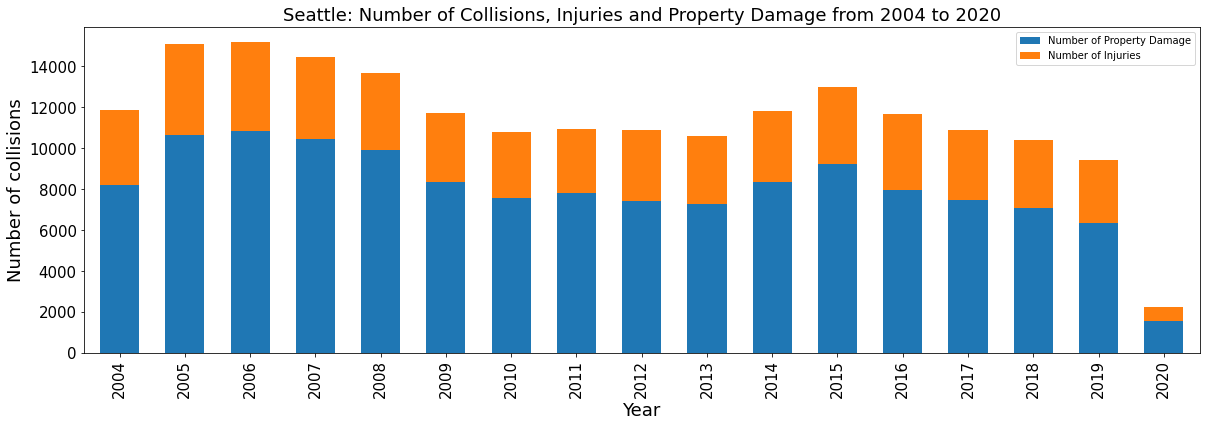

In [48]:
# attribute/feature that will be plotted
attribute = "YEAR"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='bar', figsize=(20, 6), width=.6, stacked=True)
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Number of collisions", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('Seattle: Number of Collisions, Injuries and Property Damage from 2004 to 2020', fontsize=18)
#plt.savefig(output_dir + "Collisions_year" + '.png', bbox_inches='tight', dpi=150)
plt.show()

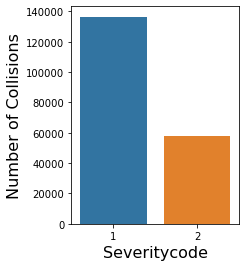

In [49]:
plt.figure(figsize=(3,4))
sns.countplot(x ='SEVERITYCODE', data = df) 
#plt.title('SEVERITYCODE', fontsize=18)
plt.xlabel('Severitycode', fontsize=16)
plt.ylabel('Number of Collisions', fontsize=16)
#plt.savefig(output_dir + "SEVERITYCODE.png", bbox_inches='tight', dpi=150)
plt.show()

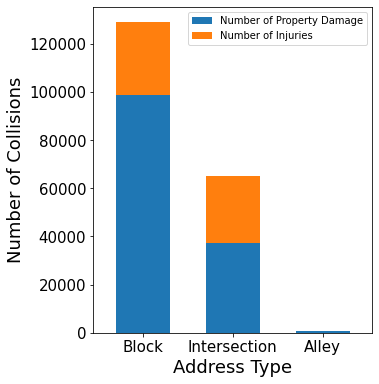

In [100]:
attribute = "ADDRTYPE"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='bar', figsize=(5, 6), width=.6, stacked=True)
ax.set_xlabel("Address Type", fontsize=18)
ax.set_ylabel("Number of Collisions", fontsize=18)
ax.set_title('ADDRTYPE', fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.setp(ax.get_xticklabels(), rotation = 0)
#plt.savefig(output_dir + "ADDRTYPE.png", bbox_inches='tight', dpi=150)
plt.show()

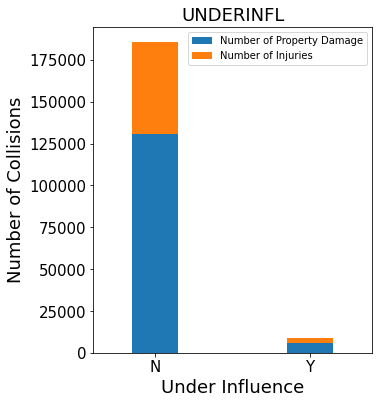

In [51]:
attribute = "UNDERINFL"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='bar', figsize=(5, 6), width=.3, stacked=True)
ax.set_xlabel("Under Influence", fontsize=18)
ax.set_ylabel("Number of Collisions", fontsize=18)
ax.set_title('UNDERINFL', fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.setp(ax.get_xticklabels(), rotation = 0)
#plt.savefig(output_dir + "UNDERINFL.png", bbox_inches='tight', dpi=150)
plt.show()

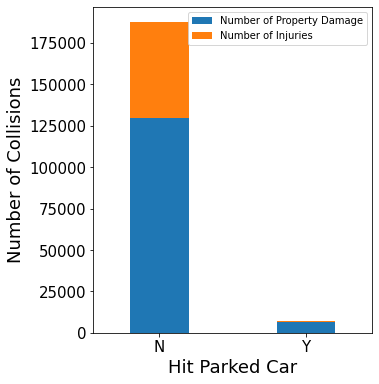

In [52]:
attribute = "HITPARKEDCAR"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='bar', figsize=(5, 6), width=.4, stacked=True)
ax.set_xlabel("Hit Parked Car", fontsize=18)
ax.set_ylabel("Number of Collisions", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.setp(ax.get_xticklabels(), rotation = 0)
#plt.savefig(output_dir + "HITPARKEDCAR.png", bbox_inches='tight', dpi=150)
plt.show()

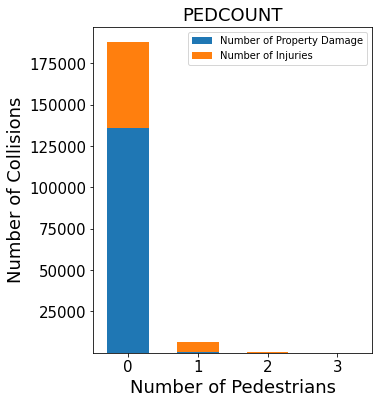

In [103]:
attribute = "PEDCOUNT"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='bar', figsize=(5, 6), width=.6, stacked=True)
ax.set_xlabel("Number of Pedestrians", fontsize=18)
ax.set_ylabel("Number of Collisions", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('PEDCOUNT', fontsize=18)
ax.set_xlim(-0.5,3.5)
plt.setp(ax.get_xticklabels(), rotation = 0)
#plt.savefig(output_dir + "PEDCOUNT.png", bbox_inches='tight', dpi=150)
plt.show()

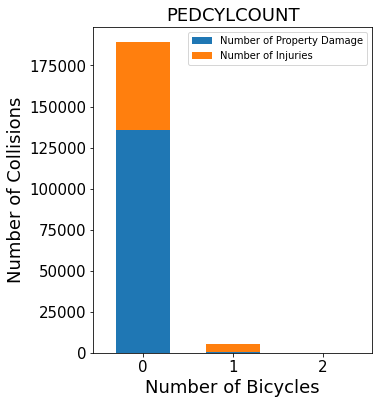

In [54]:
attribute = "PEDCYLCOUNT"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='bar', figsize=(5, 6), width=.6, stacked=True)
ax.set_xlabel("Number of Bicycles", fontsize=18)
ax.set_ylabel("Number of Collisions", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title("PEDCYLCOUNT", fontsize=18)
plt.setp(ax.get_xticklabels(), rotation = 0)
#plt.savefig(output_dir + "PEDCYLCOUNT.png", bbox_inches='tight', dpi=150)
plt.show()

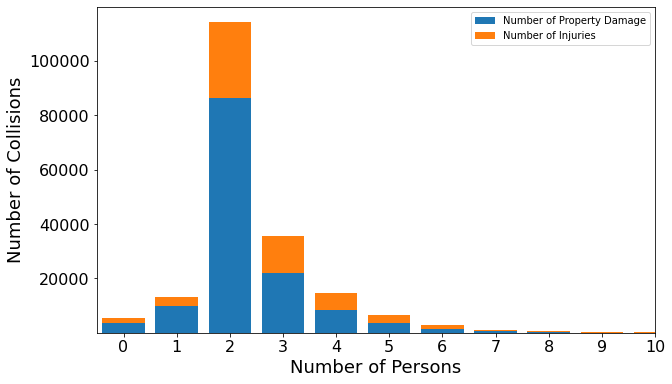

In [104]:
attribute = "PERSONCOUNT"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='bar', figsize=(10, 6), width=0.8, stacked=True)
ax.set_xlabel("Number of Persons", fontsize=18)
ax.set_ylabel("Number of Collisions", fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.setp(ax.get_xticklabels(), rotation = 0)
ax.set_xlim(-0.5,10) # there are very few collisions with >10 person
#ax.set_title('PERSONCOUNT', fontsize=18)
plt.savefig(output_dir + "PERSONCOUNT.png", bbox_inches='tight', dpi=150)
plt.show()

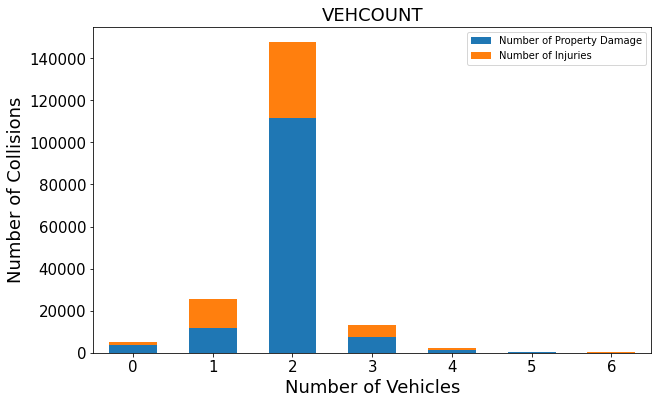

In [56]:
attribute = "VEHCOUNT"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='bar', figsize=(10, 6), width=.6, stacked=True)
ax.set_xlabel("Number of Vehicles", fontsize=18)
ax.set_ylabel("Number of Collisions", fontsize=18)
ax.set_title("VEHCOUNT", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlim(-0.5,6.5) # very few collisions are with >6 vehicles
plt.setp(ax.get_xticklabels(), rotation = 0)
#plt.savefig(output_dir + "VEHCOUNT.png", bbox_inches='tight', dpi=150)
plt.show()

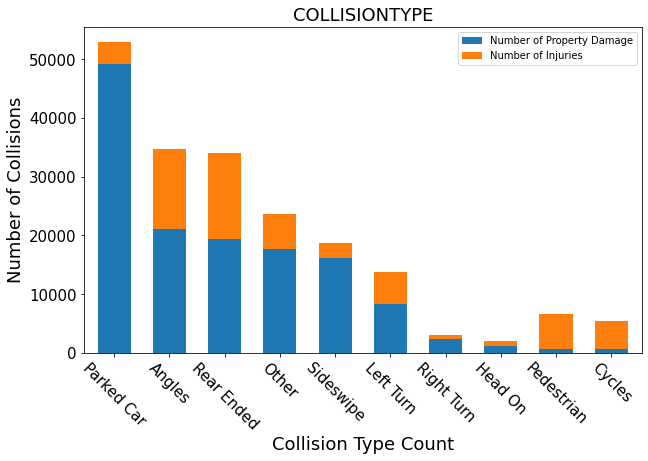

In [110]:
attribute = "COLLISIONTYPE"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='bar', figsize=(10, 6), width=.6, stacked=True)
ax.set_xlabel("Collision Type Count", fontsize=18)
ax.set_ylabel("Number of Collisions", fontsize=18)
ax.set_title("COLLISIONTYPE", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.setp(ax.get_xticklabels(), rotation = -45)
#plt.savefig(output_dir + "COLLISIONTYPE.png", bbox_inches='tight', dpi=150)
plt.show()

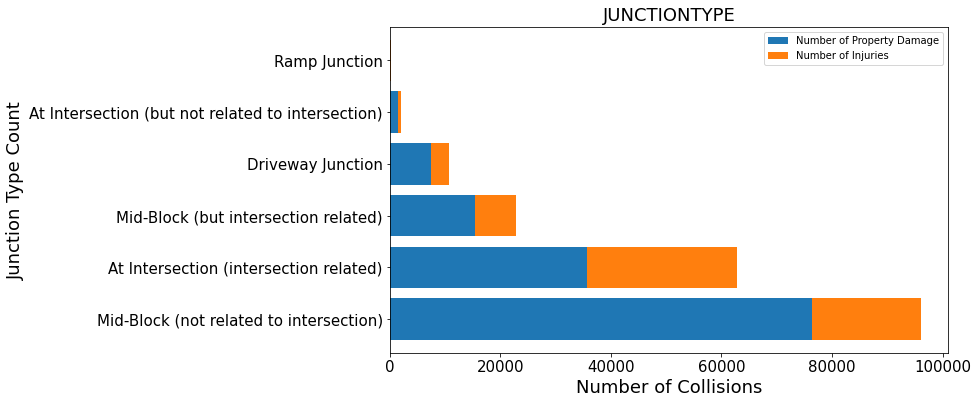

In [111]:
attribute = "JUNCTIONTYPE"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='barh', figsize=(10, 6), width=.8, stacked=True)
ax.set_ylabel("Junction Type Count", fontsize=18)
ax.set_xlabel("Number of Collisions", fontsize=18)
ax.set_title("JUNCTIONTYPE", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
#plt.savefig(output_dir + "JUNCTIONTYPE.png", bbox_inches='tight', dpi=150)
plt.show()

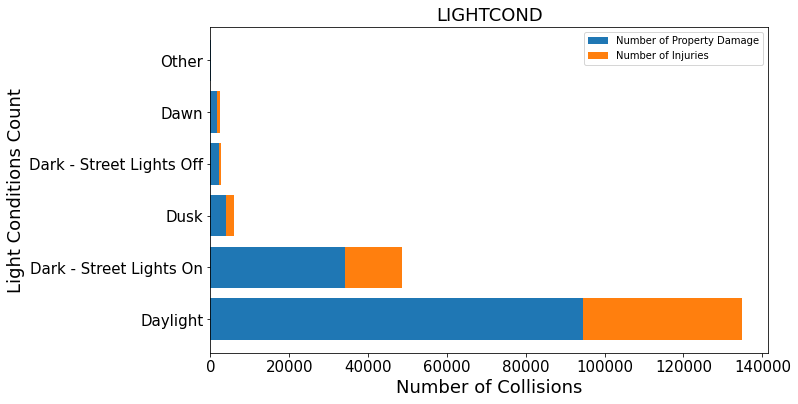

In [112]:
attribute = "LIGHTCOND"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='barh', figsize=(10, 6), width=.8, stacked=True)
ax.set_ylabel("Light Conditions Count", fontsize=18)
ax.set_xlabel("Number of Collisions", fontsize=18)
ax.set_title("LIGHTCOND", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
#plt.savefig(output_dir + "LIGHTCOND.png", bbox_inches='tight', dpi=150)
plt.show()

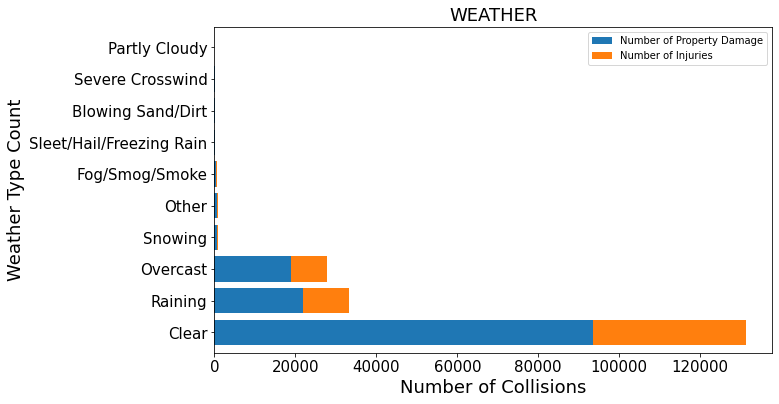

In [113]:
attribute = "WEATHER"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='barh', figsize=(10, 6), width=.8, stacked=True)
ax.set_ylabel("Weather Type Count", fontsize=18)
ax.set_xlabel("Number of Collisions", fontsize=18)
ax.set_title("WEATHER", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
#plt.savefig(output_dir + "WEATHER.png", bbox_inches='tight', dpi=150)
plt.show()

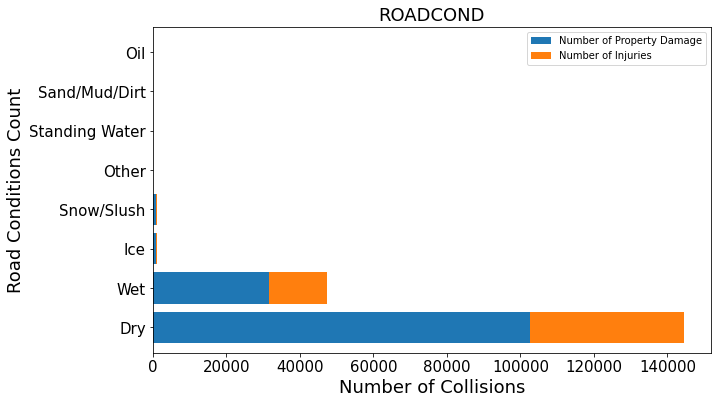

In [114]:
attribute = "ROADCOND"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='barh', figsize=(10, 6), width=.8, stacked=True)
ax.set_ylabel("Road Conditions Count", fontsize=18)
ax.set_xlabel("Number of Collisions", fontsize=18)
ax.set_title("ROADCOND", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
#plt.savefig(output_dir + "ROADCOND.png", bbox_inches='tight', dpi=150)
plt.show()

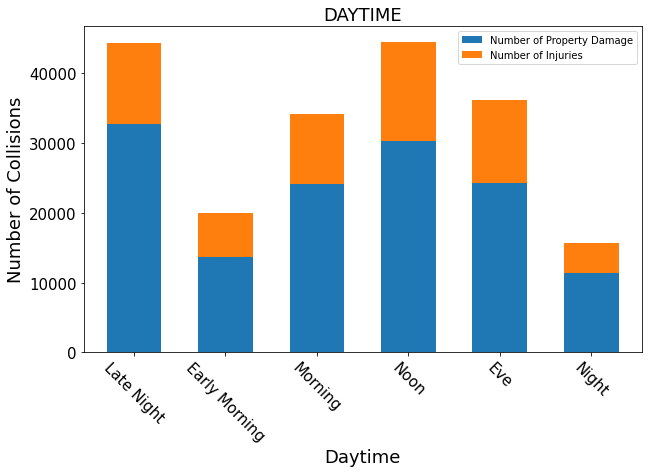

In [115]:
attribute = "DAYTIME"
result = Distribution_of_Severity(attribute)
ax = result.plot(kind='bar', figsize=(10, 6), width=.6, stacked=True)
ax.set_xlabel("Daytime", fontsize=18)
ax.set_ylabel("Number of Collisions", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title("DAYTIME", fontsize=18)
plt.setp(ax.get_xticklabels(), rotation = -45)
#plt.savefig(output_dir + "DAYTIME.png", bbox_inches='tight', dpi=150)
plt.show()

Let's have a look on a Folium map to analyze where in Seattle exactly the collisions occured.

In [63]:
# simply drop whole row with NaN in "X" and "Y" columns
df_map = df.dropna(subset=['X','Y'], axis=0)
df_map = df_map.head(1000)

# reset index, because we droped two rows
df_map.reset_index(drop=True, inplace=True)
 
latitude = df_map['Y'].mean()
longitude = df_map['X'].mean()
# create map and display it
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# instantiate a mark cluster object for the collisions in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng in zip(df_map.Y, df_map.X):
    folium.Marker(
        location=[lat, lng],
        icon=None
    ).add_to(incidents)

# display map
seattle_map

## 4. Methodology - Model Development <a name="Methodology - Model Development"></a>
## 4.1. Data preparation <a name="Data preparation"></a>

As mentioned before, we drop the columns X, Y and YEAR. The remaining columns are: 

In [64]:
df.drop(["X","Y","YEAR"], axis=1, inplace=True)
df.columns

Index(['SEVERITYCODE', 'STATUS', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR', 'DAYTIME'],
      dtype='object')

The Exploratory Data Analysis showed us, that we have a imbalanced dataset. There are more samples with the classification of Severitycode 1 ("Property Damage") than with Severitycode 2 ("Injuries"):

In [65]:
df.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

The target label (dependent variable) has to be balanced. The chosen method is down-sampling, as follows:

In [66]:
# Separate majority and minority classes
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,             # sample without replacement
                                 n_samples=len(df_minority),# to match minority class
                                 random_state=123)          # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
print("The dataset has been downsampled. The Distribution of the target label is:")
df_downsampled.SEVERITYCODE.value_counts()

The dataset has been downsampled. The Distribution of the target label is:


2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

Since we have categorical data and numerical data, it is important to convert all categorical data to numerical data.

In [67]:
# collecting columns with categorical data and numerical data seperately
category_columns = []
numeric_columns = []

for column in df_downsampled.columns:
    if ((df_downsampled[column].dtypes == 'object') or (column=='DAYTIME')):
        # find category columns
        category_columns.append(column)
    else:
        # find numeric columns
        numeric_columns.append(column)
print("Columns with categorical data: ", category_columns)
print("\nColumns with numerical data: ", numeric_columns)

Columns with categorical data:  ['STATUS', 'ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR', 'DAYTIME']

Columns with numerical data:  ['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']


In [68]:
print("The dataset with categorical and numerical data")
print(df_downsampled.head(3))

for column in category_columns:
    df_downsampled[column] = df_downsampled[column].astype('|S') 
    df_downsampled[column] = LabelEncoder().fit_transform(df_downsampled[column])
print("------------------------------------------------------------------------------")
print("\nThe encoded dataset with only numerical data:\n")
df_downsampled.head(3)

The dataset with categorical and numerical data
       SEVERITYCODE   STATUS      ADDRTYPE COLLISIONTYPE  PERSONCOUNT  \
25055             1  Matched  Intersection        Angles            2   
65280             1  Matched  Intersection        Angles            2   
86292             1  Matched  Intersection        Angles            2   

       PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  \
25055         0            0         2   
65280         0            0         2   
86292         0            0         2   

                                 JUNCTIONTYPE UNDERINFL  WEATHER ROADCOND  \
25055  At Intersection (intersection related)         N  Raining      Wet   
65280  At Intersection (intersection related)         N    Clear      Dry   
86292  At Intersection (intersection related)         N    Clear      Dry   

                     LIGHTCOND HITPARKEDCAR        DAYTIME  
25055  Dark - Street Lights On            N            Eve  
65280                 Daylight            N        Morning 

SEVERITYCODE  STATUS  ADDRTYPE  COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  \
25055             1       0         2              0            2         0   
65280             1       0         2              0            2         0   
86292             1       0         2              0            2         0   

       PEDCYLCOUNT  VEHCOUNT  JUNCTIONTYPE  UNDERINFL  WEATHER  ROADCOND  \
25055            0         2             1          0        6         7   
65280            0         2             1          0        1         0   
86292            0         2             1          0        1         0   

       LIGHTCOND  HITPARKEDCAR  DAYTIME  
25055          1             0        1  
65280          3             0        3  
86292          3             0        0

**Training and testing dataset**

The downsampled dataset will be split into training and test data. To normalize the data "StandardScaler()" will be used.

In [69]:
y = df_downsampled.SEVERITYCODE
X = df_downsampled.drop('SEVERITYCODE', axis=1)

X_scaled = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=3)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 34913
number of training samples: 81463


## 4.2. Machine-learning models <a name="Machine-learning models"></a>

In [70]:
# Train model
model_lre = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
yhat_train_lre = model_lre.predict(X_train)
# Predict on test set
yhat_test_lre= model_lre.predict(X_test)

accuracy_train_lre = accuracy_score(y_train, yhat_train_lre)
accuracy_test_lre =  accuracy_score(y_test, yhat_test_lre)

# How's our accuracy?
print( "accuracy score on the train set: ", accuracy_train_lre )
print( "accuracy score on the test set: ", accuracy_test_lre )

accuracy score on the train set:  0.6599315026453727
accuracy score on the test set:  0.6594964626356944


In [71]:
# Predict class probabilities
yhat_train_prob_lre = model_lre.predict_proba(X_train)
yhat_test_prob_lre = model_lre.predict_proba(X_test)
 
# Keep only the positive class
yhat_train_prob_lre = [p[1] for p in yhat_train_prob_lre]
yhat_test_prob_lre = [p[1] for p in yhat_test_prob_lre]

AUROC_train_lre = roc_auc_score(y_train, yhat_train_prob_lre)
AUROC_test_lre = roc_auc_score(y_test, yhat_test_prob_lre)

print( "Linear Regression's AUROC score on train set: ", AUROC_train_lre )
print( "Linear Regression's AUROC score on test set: ", AUROC_test_lre )

Linear Regression's AUROC score on train set:  0.7246428724702245
Linear Regression's AUROC score on test set:  0.7231396705468144


**Decision Tree**

In [72]:
max_depth = 5
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
model_tree.fit(X_train, y_train)

# predict with test data
yhat_train_tree = model_tree.predict(X_train)
yhat_test_tree = model_tree.predict(X_test)

In [73]:
# evaluation
accuracy_train_tree = accuracy_score(y_train, yhat_train_tree)
accuracy_test_tree = accuracy_score(y_test, yhat_test_tree)

print("DecisionTrees's Accuracy on train data: ", accuracy_train_tree)
print("DecisionTrees's Accuracy on test data: ", accuracy_test_tree)

DecisionTrees's Accuracy on train data:  0.708456599928802
DecisionTrees's Accuracy on test data:  0.7057256609285939


The decision tree can also be visualized:

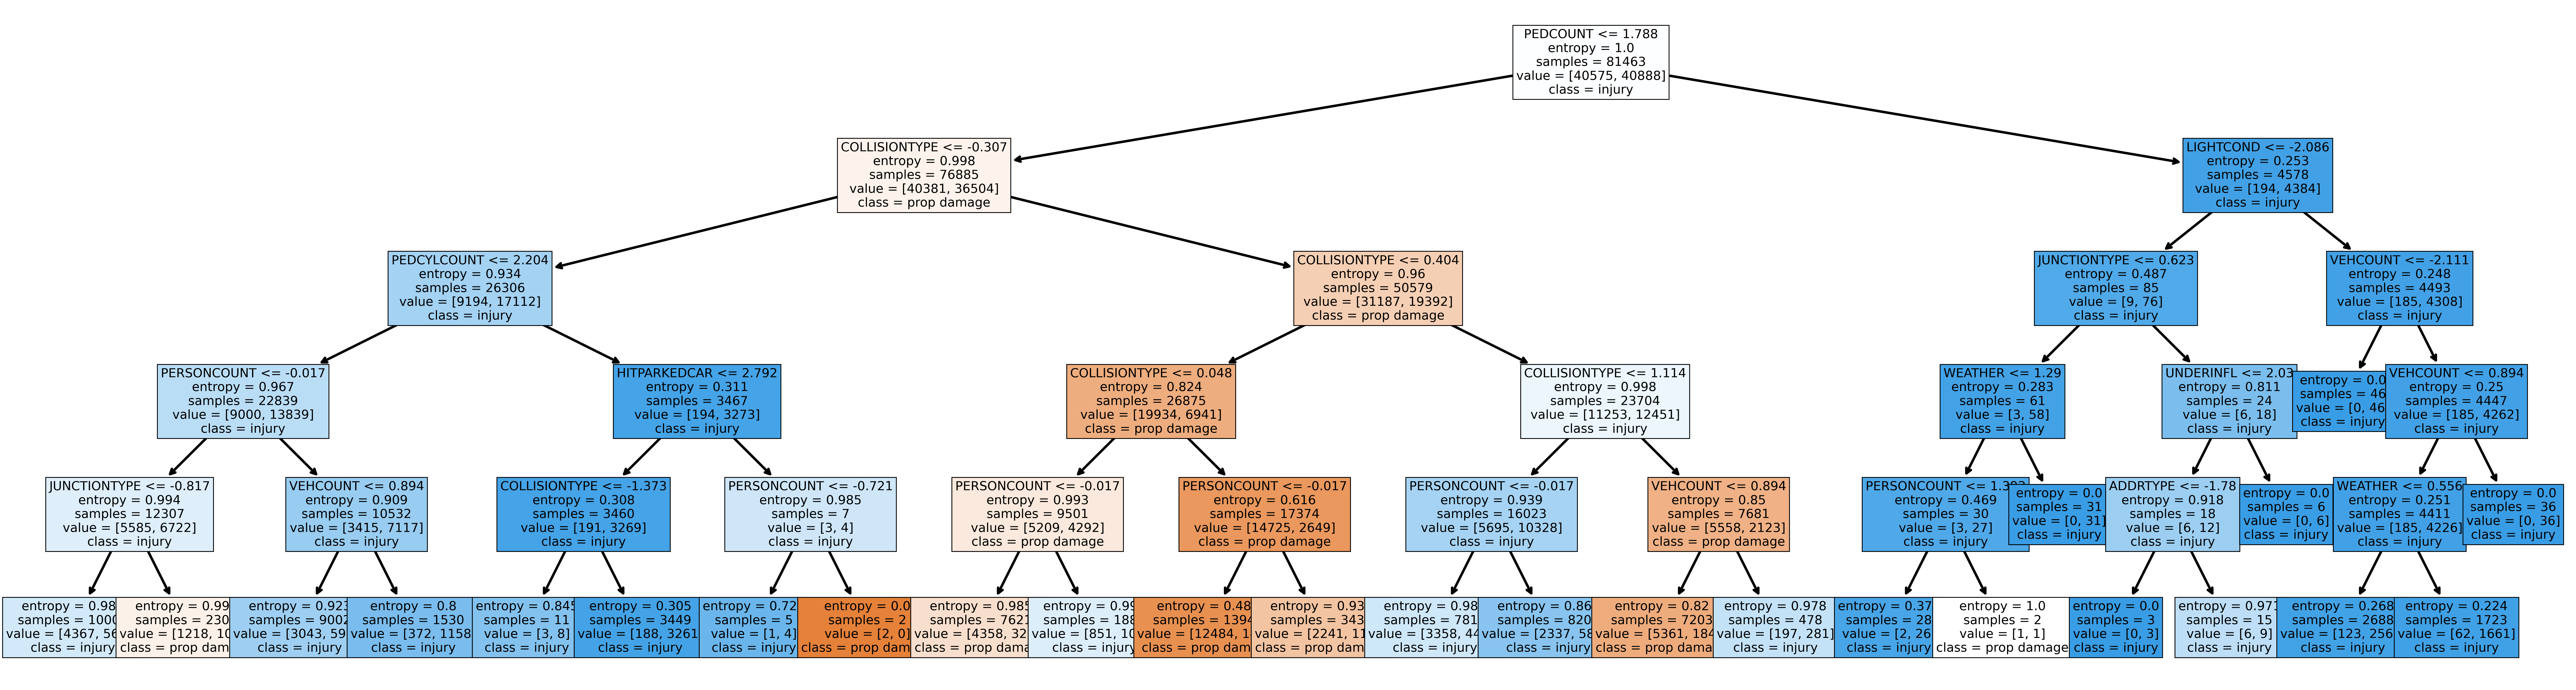

In [119]:
fn = df_downsampled.columns.to_list() # feature names
fn.remove('SEVERITYCODE')
cn=['prop damage', 'injury'] # class names

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (55,15), dpi=300)

from sklearn import tree
out = tree.plot_tree(model_tree,
               feature_names = fn, 
               class_names=cn,
               fontsize=15,
               filled = True);

for o in out: # making arrows more visible
    arrow = o.arrow_patch
    if arrow is not None: 
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

Hypertuning paramater: Finding the best depth parameter

In [75]:
# collecting depth, accuracy, model and yhat for each loop
depth_arr = [] 
accuracy_arr = []
model_arr = []
yhat_test_tree = []

depths = 20
for d in range(3, depths):
    # change depths
    model = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    
    # fit and predict
    model.fit(X_train, y_train)
    yhat_tree = model.predict(X_test)
    
    # calculate accuracy
    acc = accuracy_score(y_test, yhat_tree)
    print('depth:', d, 'acc:', acc)
    
    # save to list
    depth_arr.append(d)    
    accuracy_arr.append(acc)
    model_arr.append(model)
    yhat_test_tree.append(yhat_tree)

depth: 3 acc: 0.6624180104832011
depth: 4 acc: 0.7016011227909374
depth: 5 acc: 0.7057256609285939
depth: 6 acc: 0.7069572938446996
depth: 7 acc: 0.7066135823332284
depth: 8 acc: 0.7069286512187437
depth: 9 acc: 0.706785438088964
depth: 10 acc: 0.7064130839515367
depth: 11 acc: 0.7056683756766821
depth: 12 acc: 0.7042362443788847
depth: 13 acc: 0.7009996276458625
depth: 14 acc: 0.6988800733251225
depth: 15 acc: 0.6979635092945321
depth: 16 acc: 0.6971328731418096
depth: 17 acc: 0.6967032337524705
depth: 18 acc: 0.6953856729584968
depth: 19 acc: 0.6924354824850343


Text(0.5, 0, '"Max_depth" parameter')

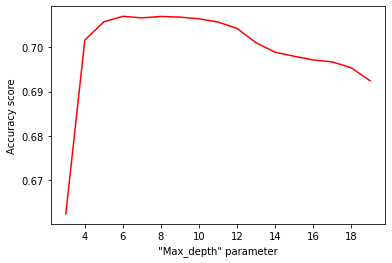

In [76]:
# visualizing Accuracy vs. max_depth parameter
plt.plot(depth_arr, accuracy_arr, 'r-')
plt.ylabel('Accuracy score')
plt.xlabel('"Max_depth" parameter')

In [77]:
index = np.argmax(accuracy_arr)
print("Index of accuracy array: ", index )
print("Best max_depth parameter: ", depth_arr[index])
print("Decision tree's accuracy score on test data: ", accuracy_arr[index])
yhat_test_tree = yhat_test_tree[index]

Index of accuracy array:  3
Best max_depth parameter:  6
Decision tree's accuracy score on test data:  0.7069572938446996


**Random Forest**

In [78]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Predict on training set
yhat_train_rf = model_rf.predict(X_train)
# Predict on training set
yhat_test_rf = model_rf.predict(X_test)

# How's our accuracy?
accuracy_train_rf = accuracy_score(y_train, yhat_train_rf)
accuracy_test_rf = accuracy_score(y_test, yhat_test_rf)
print( "Random Forest's accuracy in train data: ", accuracy_train_rf )
print( "Random Forest's accuracy on test data: ", accuracy_test_rf )
 
# What about AUROC on train data?
yhat_train_prob_rf = model_rf.predict_proba(X_train)
yhat_train_prob_rf = [p[1] for p in yhat_train_prob_rf]
AUROC_train_tree = roc_auc_score(y_train, yhat_train_prob_rf)

# What about AUROC on test data?
yhat_test_prob_rf = model_rf.predict_proba(X_test)
yhat_test_prob_rf = [p[1] for p in yhat_test_prob_rf]
AUROC_test_tree = roc_auc_score(y_test, yhat_test_prob_rf) 

print( "Random Forest's AUROC score on train data: ", AUROC_train_tree )
print( "Random Forest's AUROC score on test data: ", AUROC_test_tree )

Random Forest's accuracy in train data:  0.7620392079839927
Random Forest's accuracy on test data:  0.6927791939965056
Random Forest's AUROC score on train data:  0.8581426014685927
Random Forest's AUROC score on test data:  0.7680012267607118


**Importances of features**

In [79]:
df_downsampled.columns

Index(['SEVERITYCODE', 'STATUS', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR', 'DAYTIME'],
      dtype='object')

In [80]:
# list of features
columns_list = df_downsampled.columns.to_list()
columns_list.remove('SEVERITYCODE')
# get importance of feature using machine-learning models
importance_lre = model_lre.coef_[0]
importance_tree = model_tree.feature_importances_
importance_rf = model_rf.feature_importances_

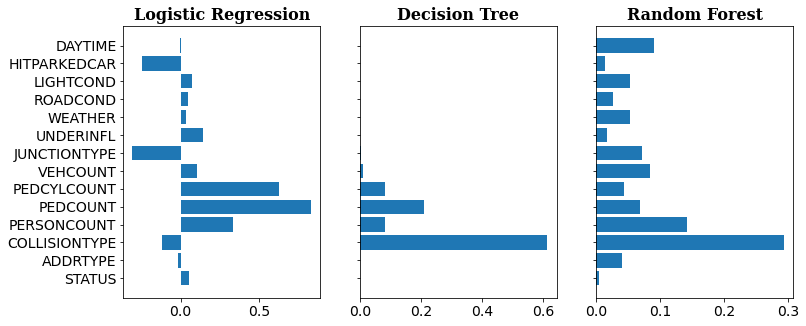

In [81]:
# Visualizing feature importance of each machine-learning model
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }

fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
axs[0].barh(columns_list, importance_lre)
axs[1].barh(columns_list, importance_tree)
axs[2].barh(columns_list, importance_rf)
#titles
axs[0].set_title('Logistic Regression', fontdict=font)
axs[1].set_title('Decision Tree', fontdict=font)
axs[2].set_title('Random Forest', fontdict=font)
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 14)
axs[1].tick_params(axis = 'both', which = 'major', labelsize = 14)
axs[2].tick_params(axis = 'both', which = 'major', labelsize = 14)
#fig.suptitle('Feature importance')
#plt.savefig(output_dir + "feature_importance.png", bbox_inches='tight', dpi=150)
plt.show()

## 5. Results <a name="Results"></a>

In [82]:
def scores_output(realdata, predicted_data, model_name):
    jac_score = round(jaccard_score(realdata,predicted_data),2)
    acc_score = round(accuracy_score(realdata, predicted_data),2)
    f_1_score = round(f1_score(realdata, predicted_data),2)
    prec_score = round(precision_score(realdata, predicted_data),2)
    rec_score = round(recall_score(realdata, predicted_data),2)
    auroc_score = round(roc_auc_score(realdata, predicted_data),2)
    
    result = pd.DataFrame({'jaccard':jac_score, 'accuracy':acc_score, 'f1-score':f_1_score, 'precision':prec_score, 'recall':rec_score, 'AUROC':auroc_score}, index=[model_name])
    #c_report = classification_report(realdata, predicted_data)
    return result

In [83]:
print("Scores of predictions models using test data")
df_scores = scores_output(y_test, yhat_test_lre, "Logistic Regression")
df_scores = df_scores.append(scores_output(y_test, yhat_test_tree, "Decision Tree"))
df_scores = df_scores.append(scores_output(y_test, yhat_test_rf, "Random Forest"))
df_scores

Scores of predictions models using test data


jaccard  accuracy  f1-score  precision  recall  AUROC
Logistic Regression     0.51      0.66      0.68       0.65    0.71   0.66
Decision Tree           0.51      0.71      0.68       0.76    0.61   0.71
Random Forest           0.51      0.69      0.67       0.73    0.62   0.69

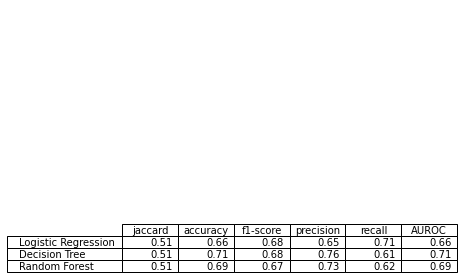

In [116]:
from pandas.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df_scores)  # where df is your data frame

plt.savefig('output/evaluation.png', bbox_inches='tight', dpi=150)